In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
v = 0.01

In [42]:
transition = pd.read_csv('/Users/yitongzheng/Documents/Corey/BCM/diffusion/configuration/0908/1000_1000_42_com/transition_1000_1000_42_1.txt')
transition['AV'] = transition['area'] / transition['v']

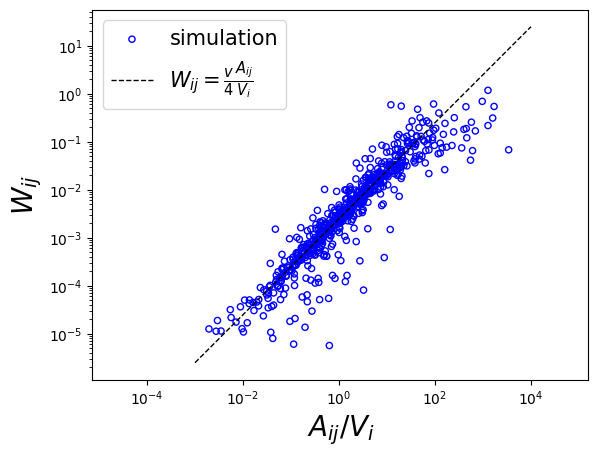

In [43]:
x = transition['AV'].to_numpy()
y = transition['T'].to_numpy()

a = transition['area'].to_numpy()

th = 0.1
x = x[np.where(a < th)]
y = y[np.where(a < th)]

plt.scatter(x, y, s=20, marker='o', facecolors='none', edgecolors='b')
plt.plot([1e-3, 1e4], np.array([1e-3, 1e4])*v/4, 'k--', linewidth=1.0)
plt.xlabel(r'$A_{ij}/V_i$', fontsize=20)
plt.ylabel(r'$W_{ij}$', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.legend(['simulation', r'$W_{ij}=\frac{v}{4}\frac{A_{ij}}{V_i}$'], fontsize=15)
plt.show()

In [51]:
filepath = '/Users/yitongzheng/Documents/Corey/BCM/diffusion/configuration/0827/'
filepathTmp = filepath + 'packingFraction/'

pf = pd.read_csv('/Users/yitongzheng/Documents/Corey/BCM/diffusion/configuration/0827/packingFraction/pf_1000_1000_42.txt', sep=' ')
tetraInfo = pd.read_csv(filepathTmp + str(1000) + '_' + str(42) +  '_tetra.txt', sep=',')

pf = pf.dropna(axis = 1)
numConfigurations = len(pf)

pf = pf.T
pf.index = pf.index.astype(int)
pf = pf.reset_index()
pf = pf.rename(columns={'index': 'id'})
pf = pf.sort_index()

percolation = pf.copy()

cols = [i for i in range(numConfigurations)]
percolation[cols] = percolation[cols].mask(percolation[cols] < 1e-8, np.nan)

weighted = percolation.copy()
weighted = weighted.set_index('id')
tetraInfo = tetraInfo.set_index('id')
weighted[cols] *= tetraInfo.loc[weighted.index, "vol_fraction"].to_numpy()[:, None]

pf = weighted.sum()

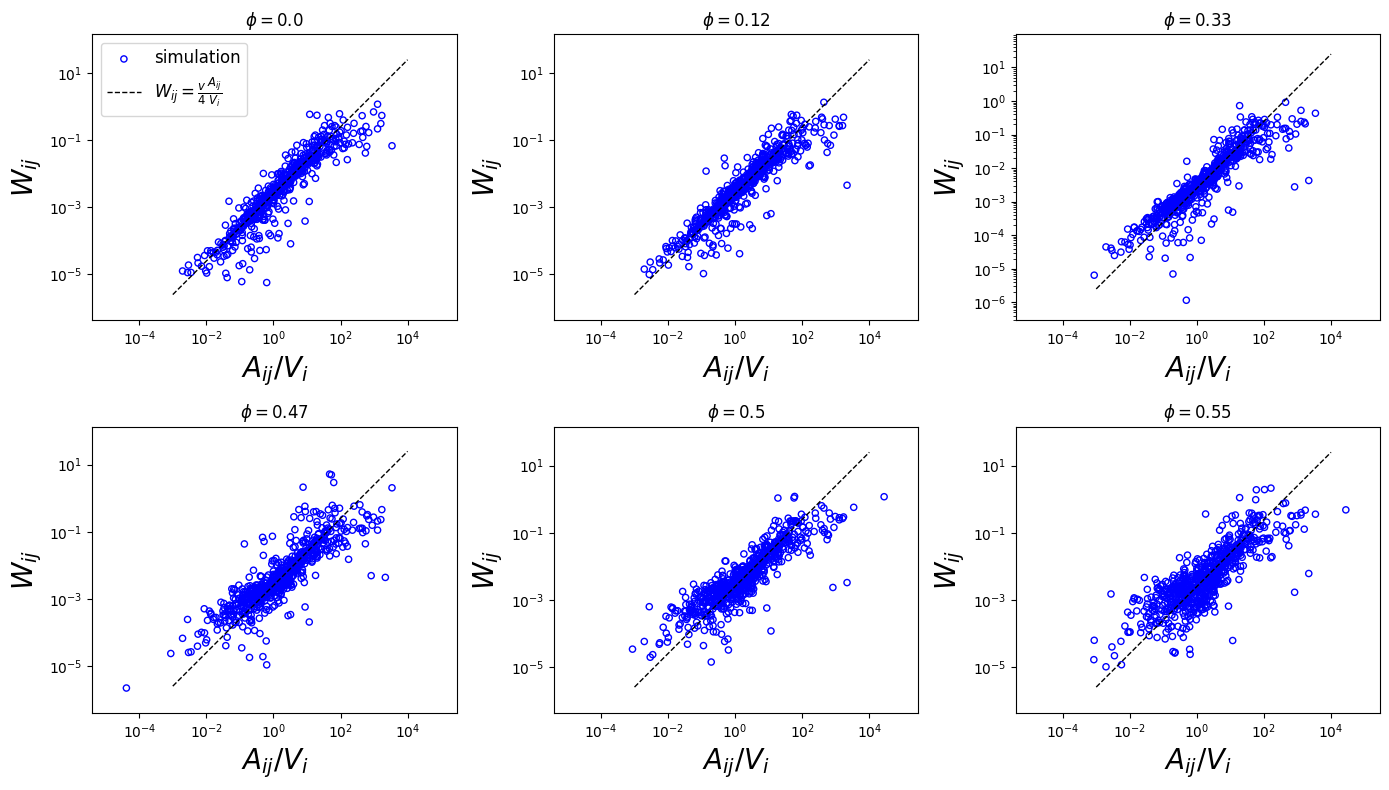

In [56]:
frames = [1, 100, 150, 185, 200, 220]
fig = plt.figure(figsize=(14, 8))
for i, frame in enumerate(frames):
    transition = pd.read_csv('/Users/yitongzheng/Documents/Corey/BCM/diffusion/configuration/0908/1000_1000_42_com/transition_1000_1000_42_' + str(frame) + '.txt')
    transition['AV'] = transition['area'] / transition['v']
    
    x = transition['AV'].to_numpy()
    y = transition['T'].to_numpy()

    a = transition['area'].to_numpy()

    th = 0.1
    x = x[np.where(a < th)]
    y = y[np.where(a < th)]

    plt.subplot(2, 3, i+1)
    plt.scatter(x, y, s=20, marker='o', facecolors='none', edgecolors='b')
    plt.plot([1e-3, 1e4], np.array([1e-3, 1e4])*v/4, 'k--', linewidth=1.0)
    plt.xlabel(r'$A_{ij}/V_i$', fontsize=20)
    plt.ylabel(r'$W_{ij}$', fontsize=20)
    plt.xscale('log')
    plt.yscale('log')
    plt.axis('equal')
    plt.title(r'$\phi = $' + str(int(pf[frame]*100)/100))

plt.subplot(2, 3, 1)
plt.legend(['simulation', r'$W_{ij}=\frac{v}{4}\frac{A_{ij}}{V_i}$'], fontsize=12)
plt.tight_layout()
plt.show()